# MNIST Improved Model

In this notebook, we create an improved (from our baseline) model for handwritten digit recognition on the MNIST data set.

### Import packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scipy
from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

### Load data

In [2]:
train_data = pd.read_csv("../data/train.csv")
X_test = pd.read_csv("../data/test.csv")

X_train = train_data.drop('label', axis=1)
y_train = train_data['label'].values

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.values.reshape(-1, 28, 28)
X_test = X_test.values.reshape(-1, 28, 28)

## Define model

In [3]:
def create_model_1():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Conv2D(128, (5, 5), padding='Same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Softmax(),
    ])

In [4]:
def create_model_2():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Conv2D(128, (5, 5), padding='Same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Softmax(),
    ])

In [5]:
def create_model_3():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Conv2D(96, (5, 5), padding='Same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (5, 5), padding='Same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Softmax(),
    ])

## Define training parameters

In [6]:
EPOCHS = 25

## Validation

In [7]:
# Split the train set into train_val and test_val set
# Test size is 0.2857
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, 
                                                                    test_size = 0.2857, 
                                                                    random_state = 0)

In [8]:
model_1 = create_model_1()
model_2 = create_model_2()
model_3 = create_model_3()

In [9]:
model_1.compile(optimizer=tf.keras.optimizers.legacy.Adam(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"])

In [10]:
model_2.compile(optimizer=tf.keras.optimizers.legacy.Adam(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"])

In [11]:
model_3.compile(optimizer=tf.keras.optimizers.legacy.Adam(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"])

In [12]:
%%time
val_h1 = model_1.fit(X_train_val, y_train_val, epochs=EPOCHS)

Epoch 1/25
938/938 [==============================] - 10s 4ms/step - loss: 0.3911 - accuracy: 0.9551
Epoch 2/25
938/938 [==============================] - 4s 4ms/step - loss: 0.1836 - accuracy: 0.9772
Epoch 3/25
938/938 [==============================] - 4s 4ms/step - loss: 0.1233 - accuracy: 0.9819
Epoch 4/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0885 - accuracy: 0.9867
Epoch 5/25
938/938 [==============================] - 5s 5ms/step - loss: 0.0677 - accuracy: 0.9893
Epoch 6/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0485 - accuracy: 0.9931
Epoch 7/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0401 - accuracy: 0.9939
Epoch 8/25
938/938 [==============================] - 4s 5ms/step - loss: 0.0320 - accuracy: 0.9948
Epoch 9/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0278 - accuracy: 0.9957
Epoch 10/25
938/938 [==============================] - 4s 5ms/step - loss: 0.0232 - accuracy: 0.996

In [13]:
%%time
val_h2 = model_2.fit(X_train_val, y_train_val, epochs=EPOCHS)

Epoch 1/25
938/938 [==============================] - 6s 5ms/step - loss: 0.3896 - accuracy: 0.9546
Epoch 2/25
938/938 [==============================] - 5s 6ms/step - loss: 0.1786 - accuracy: 0.9779
Epoch 3/25
938/938 [==============================] - 5s 5ms/step - loss: 0.1185 - accuracy: 0.9831
Epoch 4/25
938/938 [==============================] - 5s 5ms/step - loss: 0.0828 - accuracy: 0.9880
Epoch 5/25
938/938 [==============================] - 5s 5ms/step - loss: 0.0624 - accuracy: 0.9905
Epoch 6/25
938/938 [==============================] - 5s 5ms/step - loss: 0.0457 - accuracy: 0.9936
Epoch 7/25
938/938 [==============================] - 5s 5ms/step - loss: 0.0381 - accuracy: 0.9943
Epoch 8/25
938/938 [==============================] - 5s 5ms/step - loss: 0.0278 - accuracy: 0.9959
Epoch 9/25
938/938 [==============================] - 5s 5ms/step - loss: 0.0228 - accuracy: 0.9970
Epoch 10/25
938/938 [==============================] - 5s 5ms/step - loss: 0.0202 - accuracy: 0.9971

In [14]:
%%time
val_h3 = model_3.fit(X_train_val, y_train_val, epochs=EPOCHS)

Epoch 1/25
938/938 [==============================] - 7s 6ms/step - loss: 0.3654 - accuracy: 0.9602
Epoch 2/25
938/938 [==============================] - 6s 7ms/step - loss: 0.1654 - accuracy: 0.9801
Epoch 3/25
938/938 [==============================] - 6s 6ms/step - loss: 0.1062 - accuracy: 0.9858
Epoch 4/25
938/938 [==============================] - 6s 6ms/step - loss: 0.0742 - accuracy: 0.9894
Epoch 5/25
938/938 [==============================] - 6s 6ms/step - loss: 0.0515 - accuracy: 0.9928
Epoch 6/25
938/938 [==============================] - 6s 6ms/step - loss: 0.0400 - accuracy: 0.9939
Epoch 7/25
938/938 [==============================] - 6s 6ms/step - loss: 0.0309 - accuracy: 0.9954
Epoch 8/25
938/938 [==============================] - 6s 7ms/step - loss: 0.0251 - accuracy: 0.9958
Epoch 9/25
938/938 [==============================] - 6s 6ms/step - loss: 0.0181 - accuracy: 0.9966
Epoch 10/25
938/938 [==============================] - 6s 6ms/step - loss: 0.0143 - accuracy: 0.9980

In [15]:
%%time
model_1_pred = model_1.predict(X_test_val)
model_2_pred = model_2.predict(X_test_val)
model_3_pred = model_3.predict(X_test_val)

f = lambda x: np.argmax(x)
vf = np.vectorize(f)

y_1_pred = np.fromiter((f(xi) for xi in model_1_pred), np.int64)
y_2_pred = np.fromiter((f(xi) for xi in model_2_pred), np.int64)
y_3_pred = np.fromiter((f(xi) for xi in model_3_pred), np.int64)

y_pred = np.array([y_1_pred, y_2_pred, y_3_pred])
y_pred = np.transpose(y_pred, (1, 0))
y_pred = scipy.stats.mode(y_pred, axis=1)[0]
y_pred = np.squeeze(y_pred)

375/375 [==============================] - 1s 2ms/step
CPU times: user 4.05 s, sys: 347 ms, total: 4.39 s
Wall time: 4.3 s


In [16]:
print(accuracy_score(y_pred, y_test_val))

0.9936666666666667


In [17]:
# Classification report
print(classification_report(y_pred, y_test_val))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1175
           1       1.00      0.99      1.00      1372
           2       1.00      0.99      0.99      1237
           3       0.99      1.00      1.00      1223
           4       0.99      0.99      0.99      1167
           5       0.99      1.00      0.99      1065
           6       1.00      0.99      0.99      1179
           7       0.99      0.99      0.99      1281
           8       1.00      0.99      0.99      1151
           9       0.99      0.99      0.99      1150

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



## Graph

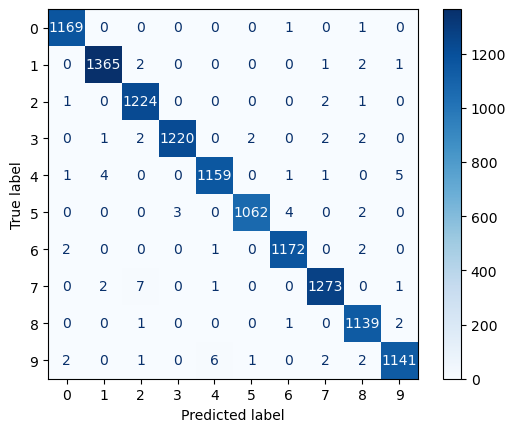

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test_val, y_pred,
                                        display_labels = range(0,10),
                                        cmap=plt.cm.Blues)

In [19]:
def plot_loss(h):
    pd.DataFrame(h.history).plot(figsize = (10,8))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.yticks(np.arange(0, 1, 0.1))
    plt.ylim(0,1)
    plt.show()

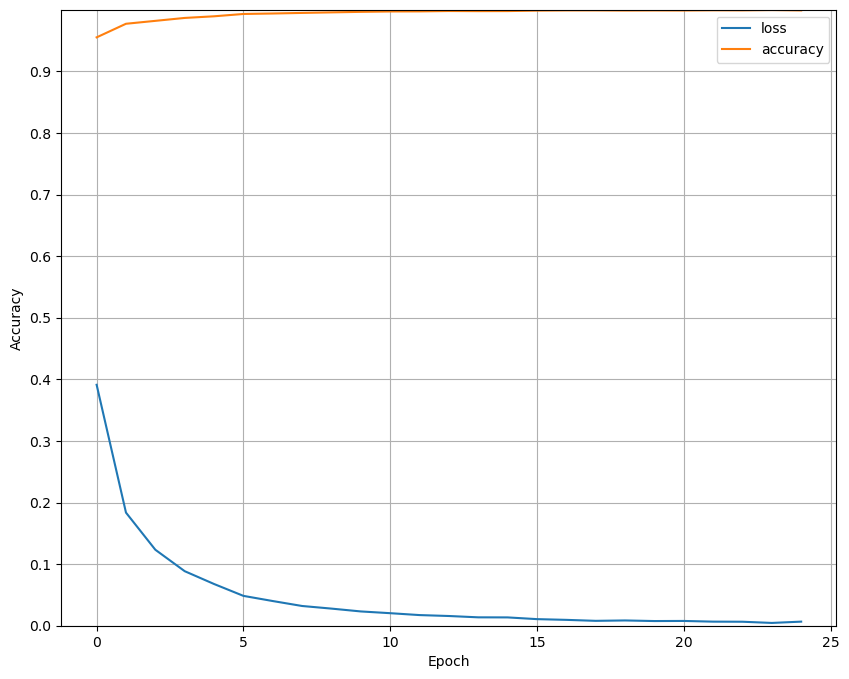

In [20]:
plot_loss(val_h1)

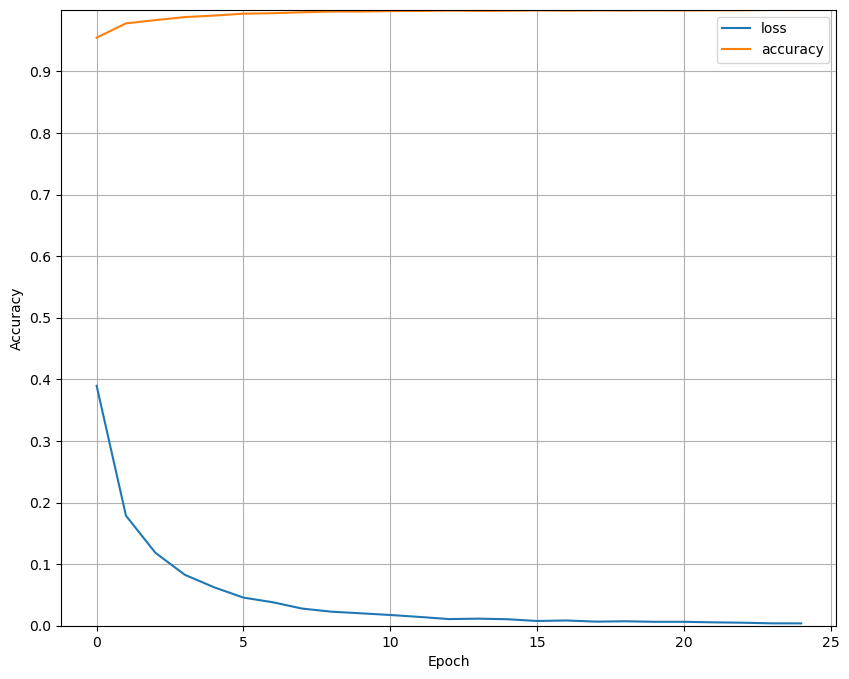

In [21]:
plot_loss(val_h2)

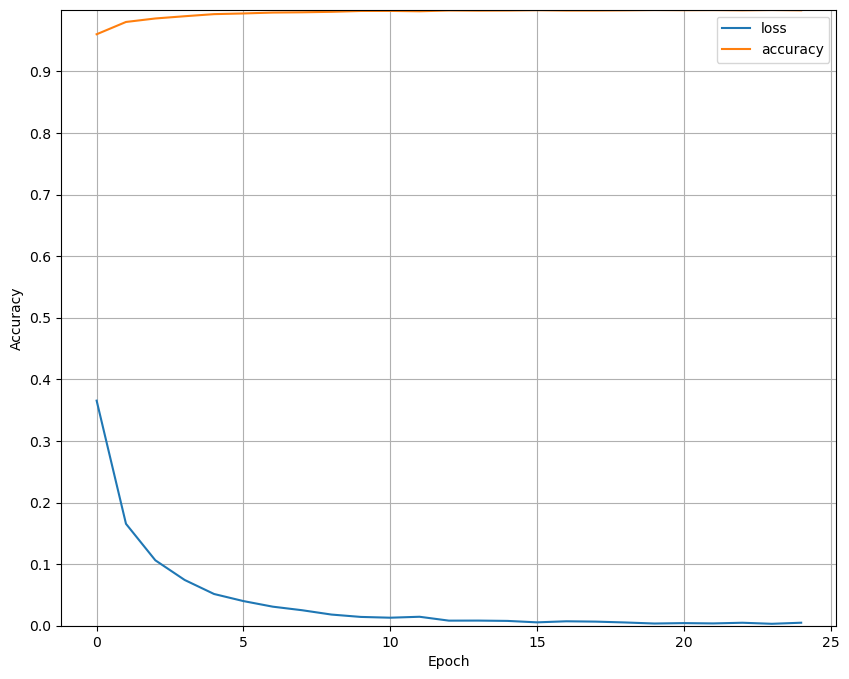

In [22]:
plot_loss(val_h3)

#### Examples of wrong prediction

In [23]:
def plot_most_important_errors(model_pred):
    y_pred_classes = np.argmax(model_pred, axis=1)
    errors = (y_pred_classes - y_test_val != 0)
    y_pred_classes_errors = y_pred_classes[errors]
    y_pred_errors = model_pred[errors]
    y_test_val_errors = y_test_val[errors]
    X_test_val_errors = X_test_val[errors]

    def display_errors(errors_index, img_errors, pred_errors, obs_errors):
        n = 0
        nrows = 2
        ncols = 3
        fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
        for row in range(nrows):
            for col in range(ncols):
                error = errors_index[n]
                ax[row, col].imshow((img_errors[error]).reshape((28, 28)), cmap=plt.cm.gray)
                ax[row, col].set_title(f"Predicted label: {pred_errors[error]}\nTrue label: {obs_errors[error]}")
                n += 1

    y_pred_errors_prob = np.max(y_pred_errors, axis=1)
    true_prob_errors = np.diagonal(np.take(y_pred_errors, y_test_val_errors, axis=1))
    delta_pred_true_errors = y_pred_errors_prob - true_prob_errors
    sorted_delta_errors = np.argsort(delta_pred_true_errors)
    most_important_errors = sorted_delta_errors[-6:]
    display_errors(most_important_errors, X_test_val_errors, y_pred_classes_errors, y_test_val_errors)

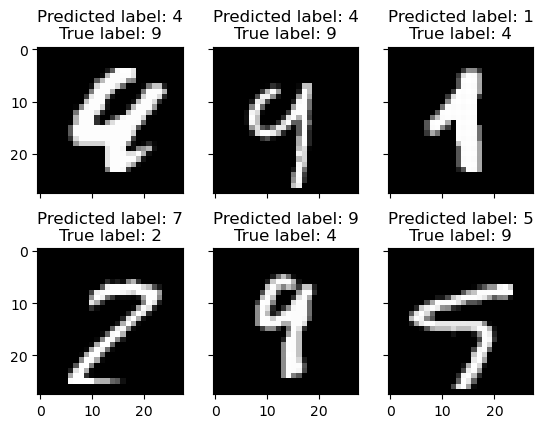

In [24]:
plot_most_important_errors(model_1_pred)

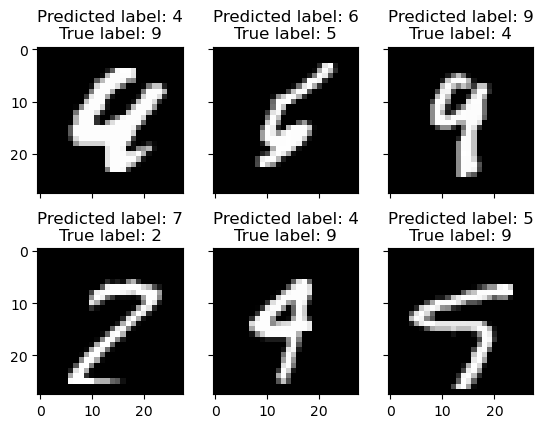

In [25]:
plot_most_important_errors(model_2_pred)

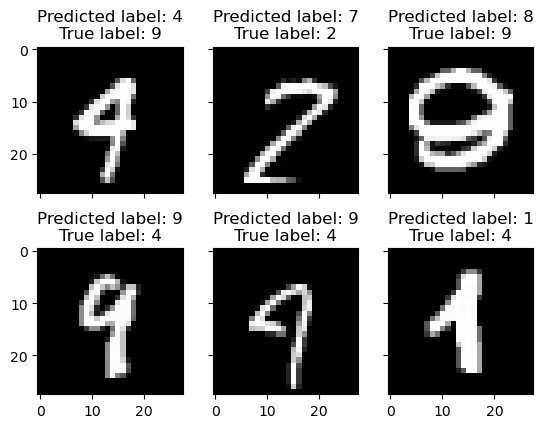

In [26]:
plot_most_important_errors(model_3_pred)

# Submission model

In [27]:
model_1_test = create_model_1()
model_2_test = create_model_2()
model_3_test = create_model_3()

In [28]:
model_1_test.compile(optimizer=tf.keras.optimizers.legacy.Adam(),
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     metrics=["accuracy"])

In [29]:
model_2_test.compile(optimizer=tf.keras.optimizers.legacy.Adam(),
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     metrics=["accuracy"])

In [30]:
model_3_test.compile(optimizer=tf.keras.optimizers.legacy.Adam(),
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     metrics=["accuracy"])

In [31]:
%%time
test_h1 = model_1_test.fit(X_train, y_train, epochs=EPOCHS)

Epoch 1/25


/opt/conda/lib/python3.7/site-packages/keras/backend.py:5586: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits, "Softmax", "sparse_categorical_crossentropy"


1313/1313 [==============================] - 7s 5ms/step - loss: 0.3405 - accuracy: 0.9609
Epoch 2/25
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1412 - accuracy: 0.9795
Epoch 3/25
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0926 - accuracy: 0.9858
Epoch 4/25
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0637 - accuracy: 0.9889
Epoch 5/25
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0472 - accuracy: 0.9917
Epoch 6/25
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0367 - accuracy: 0.9935
Epoch 7/25
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0275 - accuracy: 0.9952
Epoch 8/25
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0231 - accuracy: 0.9960
Epoch 9/25
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0185 - accuracy: 0.9968
Epoch 10/25
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0157 - accurac

In [32]:
%%time
test_h2 = model_2_test.fit(X_train, y_train, epochs=EPOCHS)

Epoch 1/25
1313/1313 [==============================] - 8s 5ms/step - loss: 0.3360 - accuracy: 0.9606
Epoch 2/25
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1416 - accuracy: 0.9798
Epoch 3/25
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0878 - accuracy: 0.9865
Epoch 4/25
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0564 - accuracy: 0.9911
Epoch 5/25
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0432 - accuracy: 0.9925
Epoch 6/25
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0332 - accuracy: 0.9945
Epoch 7/25
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0272 - accuracy: 0.9950
Epoch 8/25
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0197 - accuracy: 0.9965
Epoch 9/25
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0169 - accuracy: 0.9972
Epoch 10/25
1313/1313 [==============================] - 7s 5ms/step - loss: 0.013

In [33]:
%%time
test_h3 = model_3_test.fit(X_train, y_train, epochs=EPOCHS)

Epoch 1/25
1313/1313 [==============================] - 9s 6ms/step - loss: 0.3130 - accuracy: 0.9668
Epoch 2/25
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1291 - accuracy: 0.9827
Epoch 3/25
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0756 - accuracy: 0.9883
Epoch 4/25
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0484 - accuracy: 0.9925
Epoch 5/25
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0369 - accuracy: 0.9934
Epoch 6/25
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0260 - accuracy: 0.9955
Epoch 7/25
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0209 - accuracy: 0.9960
Epoch 8/25
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0158 - accuracy: 0.9972
Epoch 9/25
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0136 - accuracy: 0.9971
Epoch 10/25
1313/1313 [==============================] - 8s 6ms/step - loss: 0.012

In [34]:
model_1_test.save('cnn-1.h5')
model_2_test.save('cnn-2.h5')
model_3_test.save('cnn-3.h5')

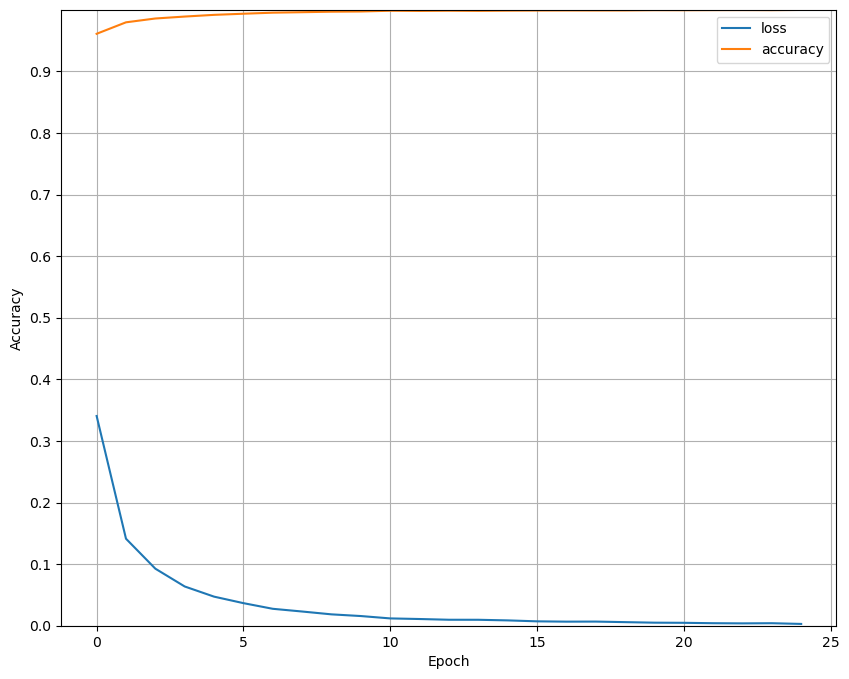

In [35]:
plot_loss(test_h1)

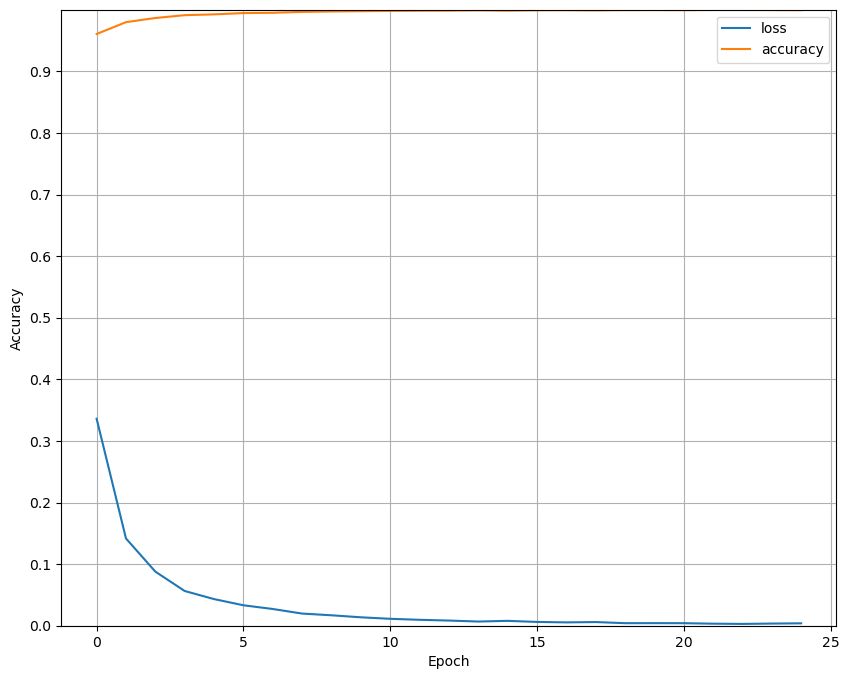

In [36]:
plot_loss(test_h2)

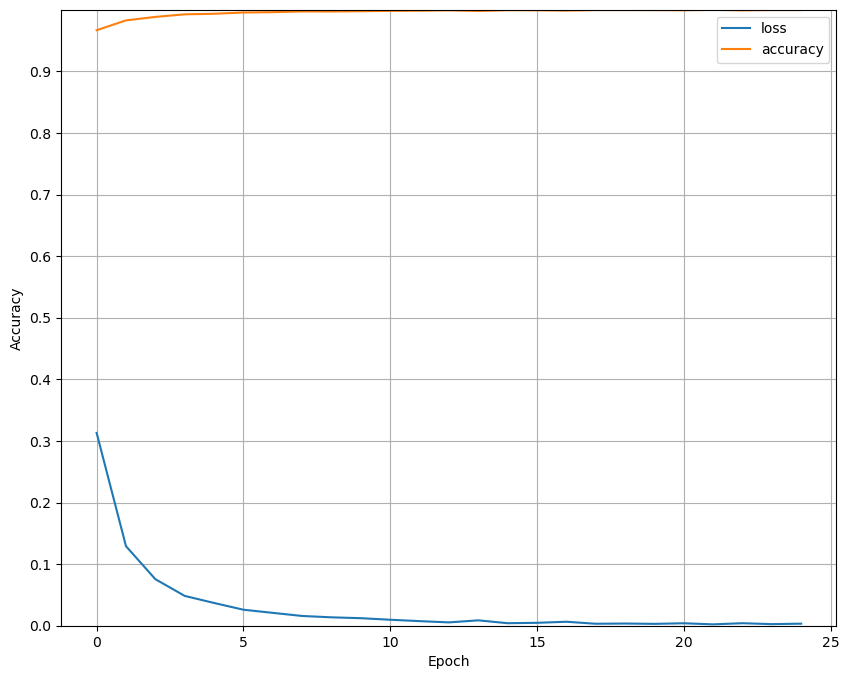

In [37]:
plot_loss(test_h3)

In [38]:
%%time
model_1_pred_test = model_1.predict(X_test)
model_2_pred_test = model_2.predict(X_test)
model_3_pred_test = model_3.predict(X_test)

f = lambda x: np.argmax(x)
vf = np.vectorize(f)

y_1_pred_test = np.fromiter((f(xi) for xi in model_1_pred_test), np.int64)
y_2_pred_test = np.fromiter((f(xi) for xi in model_2_pred_test), np.int64)
y_3_pred_test = np.fromiter((f(xi) for xi in model_3_pred_test), np.int64)

y_pred_test = np.array([y_1_pred_test, y_2_pred_test, y_3_pred_test])
y_pred_test = np.transpose(y_pred_test, (1, 0))
y_pred_test = scipy.stats.mode(y_pred_test, axis=1)[0]
y_pred_test = np.squeeze(y_pred_test)
y_pred_test

875/875 [==============================] - 2s 2ms/step
CPU times: user 8.83 s, sys: 811 ms, total: 9.64 s
Wall time: 9.55 s


array([2, 0, 9, ..., 3, 9, 2])

In [39]:
%%time
submission = pd.DataFrame({'Label': y_pred_test})
submission.index += 1

CPU times: user 2.22 ms, sys: 13 µs, total: 2.23 ms
Wall time: 1.94 ms


In [40]:
submission

,Label
1,2
2,0
3,9
4,0
5,3
...,...
27996,9
27997,7
27998,3
27999,9


In [41]:
%%time
submission.to_csv('submission.csv', index=True, index_label='ImageId')

CPU times: user 32 ms, sys: 885 µs, total: 32.9 ms
Wall time: 33.7 ms
